#Multilayer Perceptron Regression

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')
url = "https://drive.google.com/uc?export=download&id=1p6VH8ww8oR2VB8Z4btRR4c4xnQTxz2S0"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy 
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Input the data as df & create a numpy array called dataset

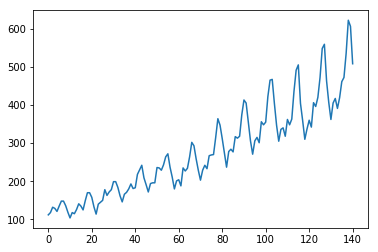

In [0]:
dataframe = pd.read_csv(url,engine= 'python' , usecols=[1],skipfooter=3)
 
dataset=dataset=dataframe.values
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)

plt.show()



In [0]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


94 47


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)      #X is the number of passengers at a given time (t) 
    dataY.append(dataset[i + look_back, 0]) # Y is the number of passengers at the next time (t+1)
  return numpy.array(dataX), numpy.array(dataY)


In [0]:

# reshape into X=t and Y=t+1
look_back = 1 #number of previous time steps to use as input variables to predict the next time period
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/200
 - 1s - loss: 47119.4265
Epoch 2/200
 - 0s - loss: 41545.7612
Epoch 3/200
 - 0s - loss: 35848.4921
Epoch 4/200
 - 0s - loss: 30059.7362
Epoch 5/200
 - 0s - loss: 24220.8540
Epoch 6/200
 - 0s - loss: 18719.5542
Epoch 7/200
 - 0s - loss: 13716.7978
Epoch 8/200
 - 0s - loss: 9549.7540
Epoch 9/200
 - 0s - loss: 6295.1625
Epoch 10/200
 - 0s - loss: 3940.7316
Epoch 11/200
 - 0s - loss: 2401.1809
Epoch 12/200
 - 0s - loss: 1484.3079
Epoch 13/200
 - 0s - loss: 961.4625
Epoch 14/200
 - 0s - loss: 702.7162
Epoch 15/200
 - 0s - loss: 584.6663
Epoch 16/200
 - 0s - loss: 536.1006
Epoch 17/200
 - 0s - loss: 515.1353
Epoch 18/200
 - 0s - loss: 509.2295
Epoch 19/200
 - 0s - loss: 508.1606
Epoch 20/200
 - 0s - loss: 507.1995
Epoch 21/200
 - 0s - loss: 506.1282
Epoch 22/200
 - 0s - loss: 505.5815
Epoch 23/200
 - 0s - loss: 507.7949
Epoch 24/200
 - 0s - loss: 508.3833
Epoch 25/200
 - 0s - loss: 505.9842
Epoch 26/200
 - 0s - loss: 508.9372
Epoch 27/200
 - 0s - loss: 507.8899
Epoch 28/200
 - 0s

In [0]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train MSE and RMSE:',(trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( ('Test MSE and RMSE:',testScore, math.sqrt(testScore)))

Train MSE and RMSE: (502.98828390370244, 22.427400293027777)
('Test MSE and RMSE:', 2048.780197482639, 45.26345322092249)


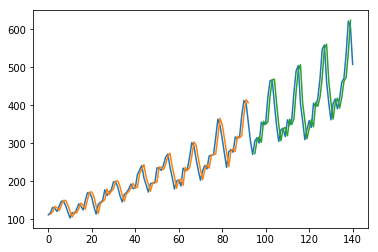

In [0]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Multilayer Perceptron Using the Window Method

It's a regression problem with the input variables are t-2, t-1, t and the output variable is t+1

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [0]:
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/200
 - 1s - loss: 1670.1791
Epoch 2/200
 - 0s - loss: 1338.5540
Epoch 3/200
 - 0s - loss: 1310.8169
Epoch 4/200
 - 0s - loss: 1228.6793
Epoch 5/200
 - 0s - loss: 1170.9096
Epoch 6/200
 - 0s - loss: 1213.8885
Epoch 7/200
 - 0s - loss: 1147.8341
Epoch 8/200
 - 0s - loss: 1091.9570
Epoch 9/200
 - 0s - loss: 1062.8630
Epoch 10/200
 - 0s - loss: 1033.4355
Epoch 11/200
 - 0s - loss: 1077.9398
Epoch 12/200
 - 0s - loss: 1034.9093
Epoch 13/200
 - 0s - loss: 1025.0057
Epoch 14/200
 - 0s - loss: 1040.6515
Epoch 15/200
 - 0s - loss: 955.8865
Epoch 16/200
 - 0s - loss: 934.1235
Epoch 17/200
 - 0s - loss: 991.3689
Epoch 18/200
 - 0s - loss: 924.2302
Epoch 19/200
 - 0s - loss: 947.7087
Epoch 20/200
 - 0s - loss: 858.7956
Epoch 21/200
 - 0s - loss: 900.4036
Epoch 22/200
 - 0s - loss: 896.0317
Epoch 23/200
 - 0s - loss: 838.5557
Epoch 24/200
 - 0s - loss: 826.2728
Epoch 25/200
 - 0s - loss: 799.4730
Epoch 26/200
 - 0s - loss: 805.2413
Epoch 27/200
 - 0s - loss: 809.0692
Epoch 28/200
 - 0s - lo

In [0]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train MSE and RMSE' ,(trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test MSE and RMSE' ,(testScore, math.sqrt(testScore)))

Train MSE and RMSE (205.35969727297862, 14.330376731718486)
Test MSE and RMSE (943.5794813368055, 30.717738870834967)


In [0]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

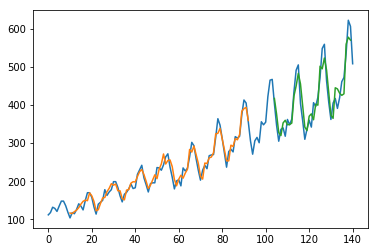

In [0]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#LSTM for regression

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape input to be [samples, time steps, features]
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [0]:
# create and fit the LSTM network
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential
from keras import layers
batch_size = 1
model = Sequential()
model.add(layers.LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
for i in range(100):
  model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/1
 - 2s - loss: 0.0114
Epoch 1/1
 - 0s - loss: 0.0185
Epoch 1/1
 - 0s - loss: 0.0124
Epoch 1/1
 - 0s - loss: 0.0083
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0049
Epoch 1/1
 - 0s - loss: 0.0049
Epoch 1/1
 - 0s - loss: 0.0049
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/

In [0]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [0]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train RMSE:',(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test RMSE:', (testScore))

Train RMSE: 26.46956873697526
Test RMSE: 58.10517287735403


In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

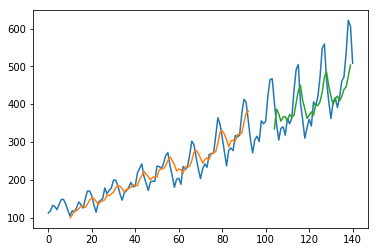

In [0]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Chollet	Listing 6.2.3

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Input the IMDB data

In [0]:
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


 LSTM is used as model

In [0]:
from keras.layers import LSTM
from keras.models import Sequential

import keras
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.4982 - acc: 0.7682 - val_loss: 0.3998 - val_acc: 0.8286
Epoch 2/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2974 - acc: 0.8834 - val_loss: 0.3124 - val_acc: 0.8654
Epoch 3/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2395 - acc: 0.9093 - val_loss: 0.2839 - val_acc: 0.8804
Epoch 4/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2016 - acc: 0.9240 - val_loss: 0.3131 - val_acc: 0.8744
Epoch 5/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1739 - acc: 0.9358 - val_loss: 0.3244 - val_acc: 0.8872
Epoch 6/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1617 - acc: 0.9425 - val_loss: 0.3641 - val_acc: 0.8372
Epoch 7/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1411 - acc: 0.9519 - val_loss: 0.3163 - val_acc:

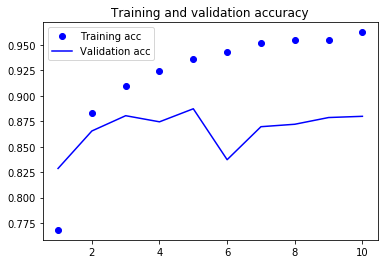

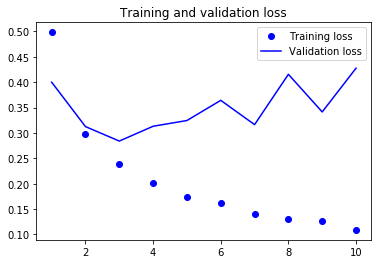

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Listing 6.49 – combine RNNs and CNNs for IMDB reviews

In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Dense
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))                       
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_12 (GRU)                 (None, 32)                6240      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 33        
Total params: 336,577
Trainable params: 336,577
Non-trainable params: 0
_________________________________________________________________
Trai

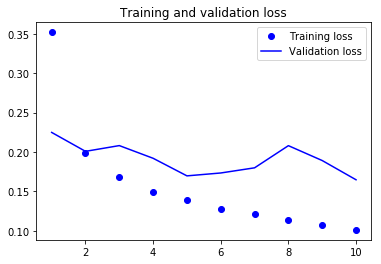

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

 CNN and RNN combination is the better model resulting in lower loss

#Chollet-	Listing 6.37 - A baseline ML model

In [0]:
#jena_climate_2009_2016.csv
drive.mount('/content/gdrive')
url = "https://drive.google.com/uc?export=download&id=19Q5fQOyhzMHIajwkhuieV1bhQvSLyjfx" #jenna csv

df = pd.read_csv(url)
dataframe=df


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

df = df.drop('Date Time', 1)
dataset=df.values
dataset=dataset.astype('float32')
  
type(dataset)
float_data=dataset

In [0]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std 


In [0]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        yield samples, targets 

In [0]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300000,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size 

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=20,
validation_data=val_gen,
validation_steps=val_steps) 

Epoch 1/20
500/500 [==============================] - 16s 33ms/step - loss: 1.2341 - val_loss: 0.6148
Epoch 2/20
500/500 [==============================] - 14s 29ms/step - loss: 0.5764 - val_loss: 0.5647
Epoch 3/20
500/500 [==============================] - 15s 29ms/step - loss: 0.4759 - val_loss: 0.6014
Epoch 4/20
500/500 [==============================] - 15s 29ms/step - loss: 0.4379 - val_loss: 0.6166
Epoch 5/20
500/500 [==============================] - 14s 28ms/step - loss: 0.4163 - val_loss: 0.5668
Epoch 6/20
500/500 [==============================] - 14s 28ms/step - loss: 0.3987 - val_loss: 0.5854
Epoch 7/20
500/500 [==============================] - 14s 29ms/step - loss: 0.3869 - val_loss: 0.6104
Epoch 8/20
500/500 [==============================] - 15s 29ms/step - loss: 0.3735 - val_loss: 0.6341
Epoch 9/20
500/500 [==============================] - 15s 29ms/step - loss: 0.3634 - val_loss: 0.5880
Epoch 10/20
500/500 [==============================] - 15s 29ms/step - loss: 0.355

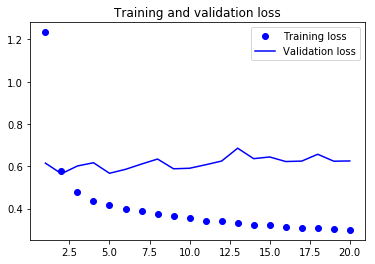

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Listing 6.40 – adding dropout to single GRU layer 

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
dropout=0.2,
recurrent_dropout=0.2,
input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=20,
validation_data=val_gen,
validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 126s 252ms/step - loss: 0.5710 - val_loss: 0.4975
Epoch 2/20
500/500 [==============================] - 124s 249ms/step - loss: 0.5458 - val_loss: 0.4977
Epoch 3/20
500/500 [==============================] - 124s 248ms/step - loss: 0.5361 - val_loss: 0.4883
Epoch 4/20
500/500 [==============================] - 124s 248ms/step - loss: 0.5219 - val_loss: 0.4802
Epoch 5/20
500/500 [==============================] - 124s 247ms/step - loss: 0.5111 - val_loss: 0.4783
Epoch 6/20
500/500 [==============================] - 123s 246ms/step - loss: 0.5065 - val_loss: 0.4755
Epoch 7/20
500/500 [==============================] - 124s 247ms/step - loss: 0.4995 - val_loss: 0.4759
Epoch 8/20
500/500 [==============================] - 122s 243ms/step - loss: 0.4951 - val_loss: 0.4741
Epoch 9/20
500/500 [==============================] - 121s 241ms/step - loss: 0.4905 - val_loss: 0.4712
Epoch 10/20
500/500 [==============================] - 127s 254m

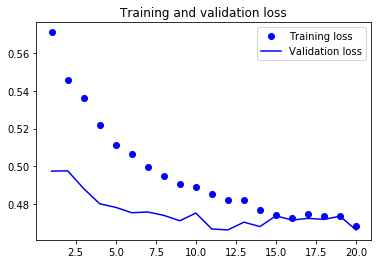

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Listing 6.41 – stacking GRUs

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
dropout=0.1,
recurrent_dropout=0.5,
return_sequences=True,
input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
dropout=0.1,
recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=10,
validation_data=val_gen,
validation_steps=val_steps)

Epoch 1/10
500/500 [==============================] - 362s 724ms/step - loss: 0.5516 - val_loss: 0.4976
Epoch 2/10
500/500 [==============================] - 359s 719ms/step - loss: 0.5328 - val_loss: 0.4895
Epoch 3/10
500/500 [==============================] - 356s 712ms/step - loss: 0.5233 - val_loss: 0.4844
Epoch 4/10
500/500 [==============================] - 356s 712ms/step - loss: 0.5163 - val_loss: 0.4763
Epoch 5/10
500/500 [==============================] - 354s 709ms/step - loss: 0.5076 - val_loss: 0.4750
Epoch 6/10
500/500 [==============================] - 355s 710ms/step - loss: 0.4984 - val_loss: 0.4703
Epoch 7/10
500/500 [==============================] - 353s 707ms/step - loss: 0.4924 - val_loss: 0.4731
Epoch 8/10
500/500 [==============================] - 353s 706ms/step - loss: 0.4876 - val_loss: 0.4750
Epoch 9/10
500/500 [==============================] - 359s 717ms/step - loss: 0.4832 - val_loss: 0.4737
Epoch 10/10
500/500 [==============================] - 357s 714m

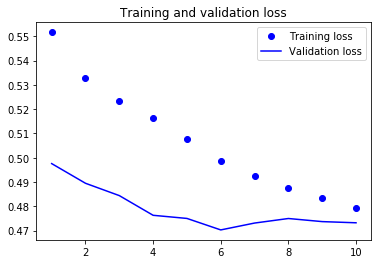

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#	Listing 6.42 – bidirectional GRUs

In [0]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [0]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

Epoch 1/10
500/500 [==============================] - 113s 227ms/step - loss: 0.4757 - val_loss: 0.4849
Epoch 2/10
500/500 [==============================] - 108s 215ms/step - loss: 0.4343 - val_loss: 0.4771
Epoch 3/10
500/500 [==============================] - 108s 217ms/step - loss: 0.3827 - val_loss: 0.4468
Epoch 4/10
500/500 [==============================] - 108s 216ms/step - loss: 0.3509 - val_loss: 0.4520
Epoch 5/10
500/500 [==============================] - 107s 215ms/step - loss: 0.3287 - val_loss: 0.4639
Epoch 6/10
500/500 [==============================] - 107s 214ms/step - loss: 0.3137 - val_loss: 0.4611
Epoch 7/10
500/500 [==============================] - 108s 217ms/step - loss: 0.2978 - val_loss: 0.4529
Epoch 8/10
500/500 [==============================] - 108s 216ms/step - loss: 0.2864 - val_loss: 0.4599
Epoch 9/10
500/500 [==============================] - 109s 218ms/step - loss: 0.2756 - val_loss: 0.4665
Epoch 10/10
500/500 [==============================] - 110s 220m

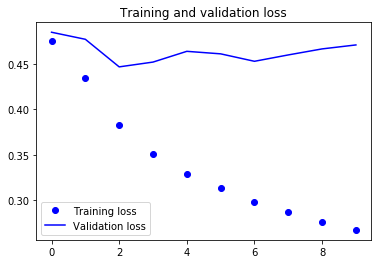

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Listing 6.49 – combine RNNs and CNNs for weather forecasting 

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',

input_shape=(None, float_data.shape[-1])))

model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=10,
validation_data=val_gen,
validation_steps=val_steps) 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_13 (GRU)                 (None, 32)                6240      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 90s 179ms/step - loss: 0.5534 - val_loss: 0.5398
Epoch 2/10
500/500 [===============

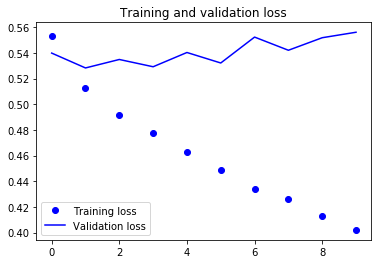

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()